In [1]:
# Preamble

## Matplotlib Configuration
import matplotlib.pyplot as plt
import matplotlib

%precision 1
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
set_matplotlib_formats('png')

#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

## Other Crap
import numpy as np
import scipy as sp
import sympy as sym
from instrumental import Q_, u
import sys
import h5py
#matplotlib.rc('text', usetex=True)
#matplotlib.rc('xtick', labelsize=16) 
#matplotlib.rc('ytick', labelsize=16)
#matplotlib.rcParams.update({'axes.labelsize': 20,'axes.titlesize': 20,'axes.facecolor': '0.9','font.size': 14 })
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,bm}"]
np.set_printoptions(precision=3)
%precision %.3g
import  matplotlib.cm as cm
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import trapz, cumtrapz
from matplotlib.colors import  ListedColormap, LogNorm, Normalize, BoundaryNorm
import matplotlib.patches as patches
from scipy.optimize import minimize_scalar
from scipy.signal import square
from scipy.integrate import solve_ivp
from os import path
from datetime import datetime
import time
fig_dir = '/Users/doddgray/Google Drive/figs'
data_dir = '/Volumes/USB20FD/sweep3_mat'
import sympy as sy
from time import sleep
import pickle
#import RII_db_tools as rii
#rii.RII_db_dir = '/Users/doddgray/Google Drive/notebooks/RII_db'
import warnings
warnings.filterwarnings('ignore') # set back to 'default' to see warnings again.
#warnings.filterwarnings('default')
colors = ['r','b','g','m','c','k','orange','purple']
from instrumental import instrument, list_instruments, list_visa_instruments
from glob import glob
#from instrumental.optics.optical_elements import Mirror, Lens, Space, Interface
#import instrumental.optics.beam_tools as bt
#import instrumental.optics.beam_plotting as bp
import os

# add MATLAB's parula colormap because it's nice

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
plt.register_cmap(cmap=parula)
# define lowest common multiple function for use in Herriott cell modeling
import fractions
def lcm(a,b): return abs(a * b) / fractions.gcd(a,b) if a and b else 0

# functions for twiny plotting (dual unit x axes sharing ticks)
def lm2f_tickfn(X):
    X_lm = X * u.nm
    X_f = (u.speed_of_light / X_lm ).to(u.THz).m
    return ["%3.3f" % z for z in X_f]

def lm2f_tickfn_offset(X,offset):
    X_lm = X * u.nm
    offset_lm = offset * u.nm
    X_f_GHz = (u.speed_of_light / X_lm ).to(u.GHz).m
    offset_f_GHz = (u.speed_of_light / offset_lm ).to(u.GHz).m
    offset_f_THz = (u.speed_of_light / offset_lm ).to(u.THz).m
    X_offset_GHz = X_f_GHz - offset_f_GHz
    return "{:3.3f}".format(offset_f_THz), ["%3.1f" % z for z in X_offset_GHz]

def f2lm_tickfn(X):
    X_f = X * u.THz
    X_lm = (u.speed_of_light / X_f ).to(u.nm).m
    return ["%4.3f" % z for z in X_lm]

def lm2f_twiny(ax):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    ax2.set_xticklabels(lm2f_tickfn(ticks))
    ax2.set_xlabel('frequency [THz]')
    return ax2

def lm2f_twiny_offset(ax,offset=None):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    if offset is None:
        offset = np.median(ticks)
    offset_THz_str, tick_str_list = lm2f_tickfn_offset(ticks,offset)
    ax2.set_xticklabels(tick_str_list)
    ax2.set_xlabel('frequency [GHz] offset from ' + offset_THz_str + ' THz')
    return ax2



def f2lm_twiny(ax):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    ax2.set_xticklabels(f2lm_tickfn(ticks))
    ax2.set_xlabel('wavelength [nm]')
    return ax2

scope_plot_params = {"lines.color": "white",
                    "patch.edgecolor": "white",
                    "text.color": "black",
                    "axes.facecolor": "black",
                    "axes.edgecolor": "lightgray",
                    "axes.labelcolor": "white",
                    "xtick.color": "white",
                    "ytick.color": "white",
                    "grid.color": "lightgray",
                    "figure.facecolor": "black",
                    "figure.edgecolor": "black",
                    "savefig.facecolor": "black",
                    "savefig.edgecolor": "black",
                    'xtick.labelsize': 20,
                    'ytick.labelsize': 20,
                    'axes.labelsize': 20,
                    'axes.titlesize': 20,
                    'font.size': 20,
                    'lines.linewidth': 1,
                    'axes.linewidth': 2,
                    'axes.grid': True,}

my_default_plot_params = {'savefig.dpi': 75,
                    'figure.autolayout': False,
                    'figure.figsize': (10, 6),
                    'font.size': 16,
                    'lines.linewidth': 2.0,
                    'lines.markersize': 8,
                    'legend.fontsize': 14,
                    'text.usetex': False,
                    'font.family': "serif",
                    'font.serif': "cm",
                    'xtick.labelsize': 20,
                    'ytick.labelsize': 20,
                    'axes.labelsize': 20,
                    'axes.titlesize': 20,
                    'font.size': 20,
                    'lines.linewidth': 2,
                    'axes.linewidth': 1.5,
                    "grid.color": '#707070',
                    'grid.linestyle':':',
                    'grid.linewidth':1,
                    'axes.grid': True,
                    'axes.grid.axis': 'both',
                    'axes.grid.which': 'both',
                    'image.cmap':'parula'}

plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update(my_default_plot_params)
%matplotlib inline

In [38]:
# import 2D profile
fpath_2D = '/Users/doddgray/Box Sync/lumerical/thermal relaxation/1550nm microrings IMEC V1/mode_script_test_tpa_gen_profile.mat'

## file contains these variables:
# Ex_norm
# Ey_norm
# g_TPA_norm
# si_mask
# x_mode
# y_mode

with h5py.File(fpath_2D, 'r') as f:
    g_tpa_norm = np.real(f["g_TPA_norm"][:].view(np.complex).squeeze())
    x_mode = f["x_mode"][:].view(np.float).squeeze()
    y_mode = f["y_mode"][:].view(np.float).squeeze()

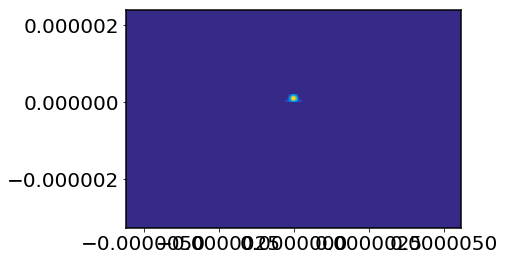

In [40]:
plt.pcolormesh(x_mode,y_mode,np.real(g_tpa_norm))

In [39]:
# generate 3D meshgrid on which to project heating profile



array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])